In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("/kaggle/input/training-data/twitter_training.csv",header=None,index_col=0)
data

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
9200,Nvidia,Positive,Just realized that the Windows partition of my...
9200,Nvidia,Positive,Just realized that my Mac window partition is ...
9200,Nvidia,Positive,Just realized the windows partition of my Mac ...


In [3]:
data=data[[2,3]].reset_index(drop=True)
data.head()


,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
data.columns=['sentiment','text']
data

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [5]:
data.shape

(74682, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74682 non-null  object
 1   text       73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,sentiment,text
count,74682,73996
unique,4,69491
top,Negative,"At the same time, despite the fact that there ..."
freq,22542,172


In [8]:
data['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [9]:
data.isna().sum()

sentiment      0
text         686
dtype: int64

In [10]:
data.sample(10)

,sentiment,text
19806,Neutral,"US WoW Token Price: 114,659g. Change: . -106g..."
50417,Negative,I was really excited for the new FIFA but I’m ...
23568,Irrelevant,I can't believe that @realDonaldTrump lied.
3725,Neutral,fucking dont care whose a fucking retcon this ...
6507,Irrelevant,AWESOME!! BONECAKES...with strawberries and o...
1179,Neutral,Today's best Borderlands deals: Wonderful Towe...
11897,Positive,On the original soundtrack 2 years and another...
64838,Positive,"@ EAMaddenNFL my ultimate team is awful love, ..."
19379,Neutral,"bring me this item I just got! [Ashjra'kamas, ..."
49952,Negative,Are EA servers down? Apex Legends & FIFA playe...


In [11]:
data.isnull().sum()

sentiment      0
text         686
dtype: int64

In [12]:
data.dropna(inplace=True)


In [13]:
data.isna().sum()

sentiment    0
text         0
dtype: int64

In [14]:
#counting the length of text 
data['text'].apply(len)

0         53
1         51
2         50
3         51
4         57
        ... 
74677    128
74678    117
74679    125
74680    159
74681    119
Name: text, Length: 73996, dtype: int64

In [15]:
#couting the text length
data['text'].apply(len).value_counts()

text
70     604
3      562
2      509
36     481
57     476
      ... 
393      1
418      1
434      1
394      1
374      1
Name: count, Length: 403, dtype: int64

In [16]:
#sum the text having length >5
sum(data['text'].apply(len)>5)

71890

In [17]:
#sum of text having len =5 and <5
sum(data['text'].apply(len)<=5)

2106

In [18]:
print(data.shape)
data=data[data['text'].apply(len)>5] # data only condains the text with length>5
print(data.shape)

(73996, 2)
(71890, 2)


In [19]:
data

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


### preprocessing with preprocess_kgptalkie

In [20]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ye81l2la
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ye81l2la
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit e5b1f0710cb1ea5ebbc73d30abe8d45a07cbb399
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11722 sha256=f1d49bbb47ee88c38f8d74b9dc8e41344ce5752ae6bd9086c0e663404a6fb79a
  Stored in directory: /tmp/pip-ephem-wheel-cache-my_mfqrh/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess_kgptalkie
Note: you may need to restart the kernel to use updated packages.


In [21]:
#pip install --upgrade preprocess_kgptalkie


In [22]:
import preprocess_kgptalkie as ps
data.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [23]:
data.columns

Index(['sentiment', 'text'], dtype='object')

### feature extraction

In [24]:
data=ps.get_basic_features(data)

/opt/conda/lib/python3.10/site-packages/preprocess_kgptalkie/utils.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_counts'] = df['text'].apply(lambda x: _get_charcounts(x))
/opt/conda/lib/python3.10/site-packages/preprocess_kgptalkie/utils.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_counts'] = df['text'].apply(lambda x: _get_wordcounts(x))
/opt/conda/lib/python3.10/site-packages/preprocess_kgptalkie/utils.py:147: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [25]:
data.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [26]:
data.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [27]:
data['hashtag_counts'].value_counts()

hashtag_counts
0      71856
1         30
2          3
198        1
Name: count, dtype: int64

### visualization

In [28]:
plt.figure(figsize=(12,6))
num_col=data.select_dtypes(include='number').columns
num_col

Index(['char_counts', 'word_counts', 'avg_wordlength', 'stopwords_counts',
       'hashtag_counts', 'mentions_counts', 'digits_counts',
       'uppercase_counts'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

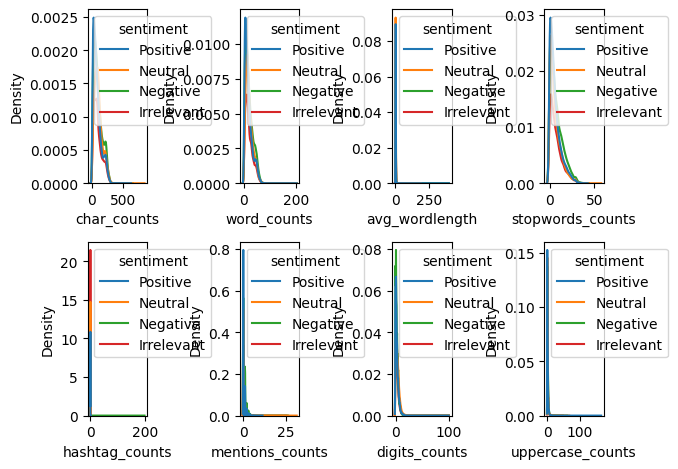

In [29]:
for index,column in enumerate(num_col):
    plt.subplot(2,4 ,index+1)
    sns.kdeplot(data=data,x=column,hue="sentiment")

plt.tight_layout()
plt.show()
    

In [30]:
#wordcloud visualization

from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

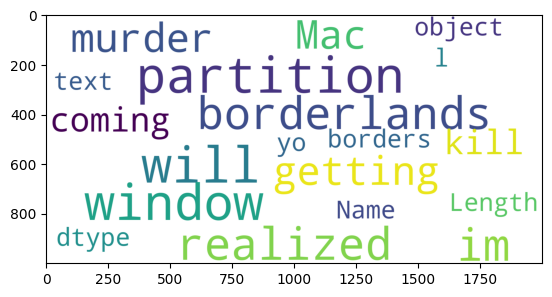

In [31]:
wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(data['text']))
plt.imshow(wordcloud)

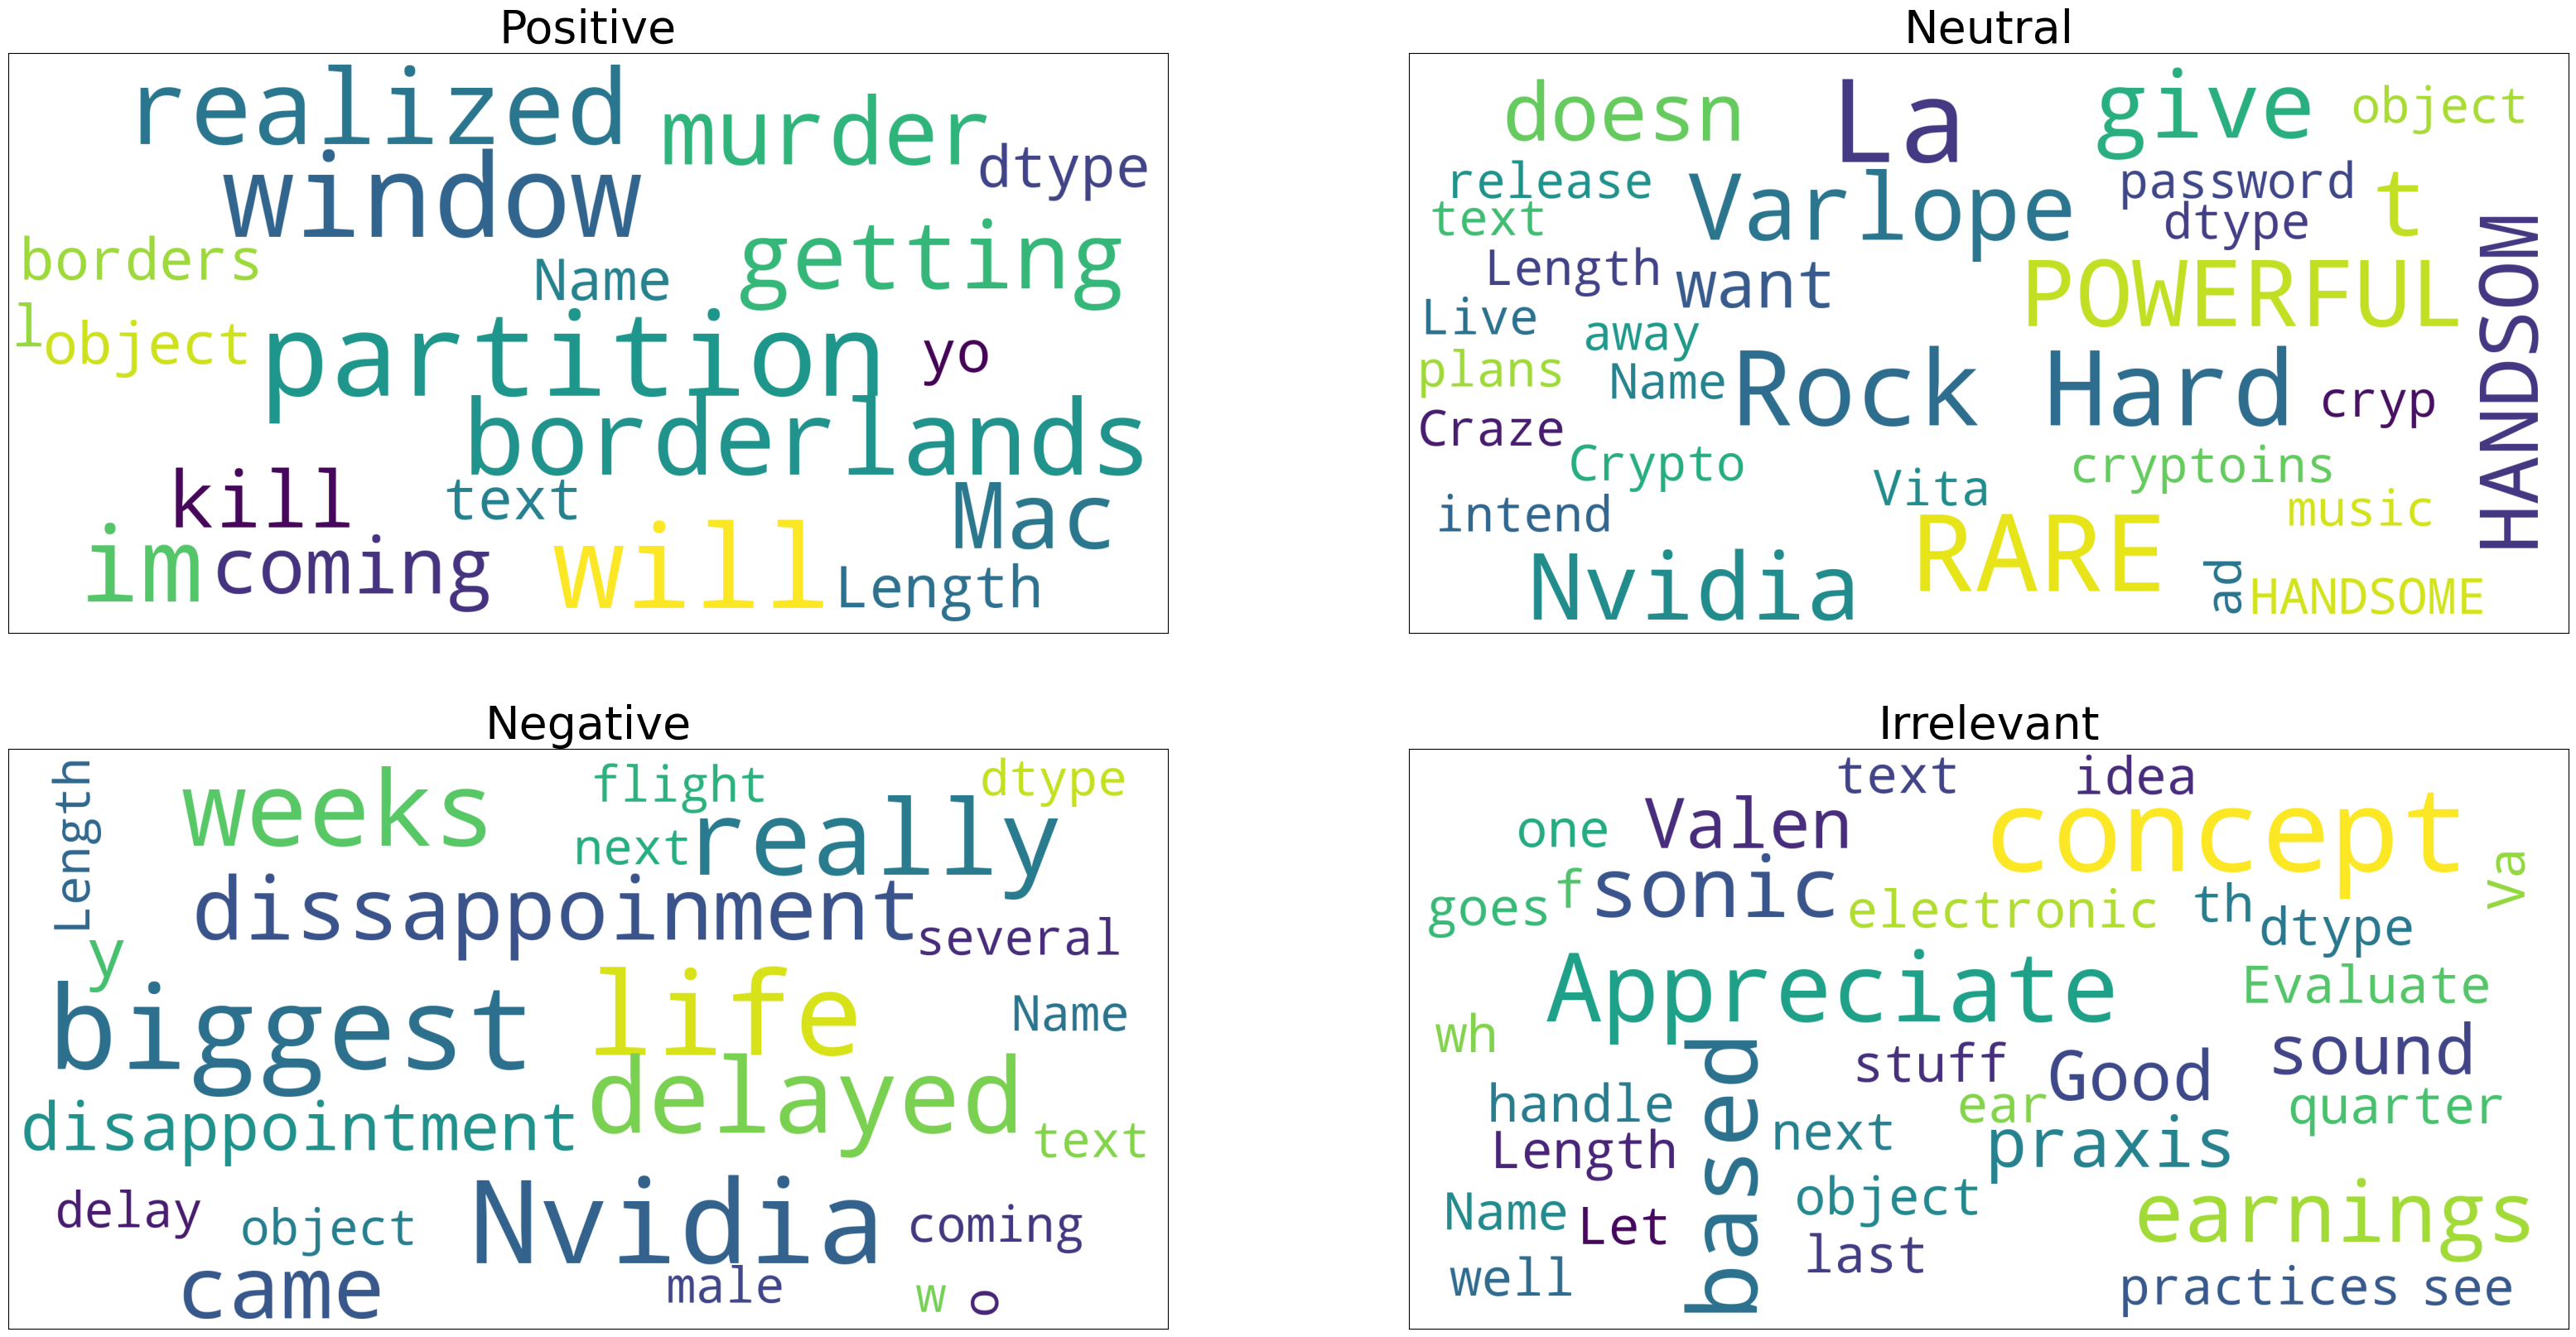

In [32]:
plt.figure(figsize=(40,20))
for index,send in enumerate(data['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    d=data[data['sentiment']==send]['text']
    wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_font_size=40,scale=5).generate(str(d))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(send,fontsize=40)

### data cleaning

In [33]:
data['text']=data['text'].apply(lambda x:x.lower())

/tmp/ipykernel_33/50848311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data['text'].apply(lambda x:x.lower())


In [34]:
data['text']=data['text'].apply(lambda x:ps.remove_urls(x))
data['text']=data['text'].apply(lambda x:ps.remove_html_tags(x))
data['text']=data['text'].apply(lambda x:ps.remove_rt(x))
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))


/tmp/ipykernel_33/2051790817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data['text'].apply(lambda x:ps.remove_urls(x))
/opt/conda/lib/python3.10/site-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()
/tmp/ipykernel_33/2051790817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['

### data splitting


In [35]:
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['sentiment'],test_size=0.2,random_state=0)

In [36]:
x_train.shape,x_test.shape

((57512,), (14378,))

### model training

In [37]:
stopwords1=list(stopwords)
#stopwords1

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf=Pipeline([('tfid',TfidfVectorizer()),('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(x_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [39]:
#evaluation
from sklearn.metrics import classification_report
predictions=clf.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.85      0.91      2483
    Negative       0.92      0.95      0.94      4439
     Neutral       0.92      0.92      0.92      3510
    Positive       0.90      0.94      0.92      3946

    accuracy                           0.92     14378
   macro avg       0.93      0.91      0.92     14378
weighted avg       0.92      0.92      0.92     14378



### model performance testing

In [40]:
clf.predict(['I am glad to see you'])

array(['Positive'], dtype=object)

### creating model file

In [41]:
import pickle
pickle.dump(clf,open("twitter_sentiment_model.pkl","wb"))